### Background Project
Asuransi kesehatan adalah salah satu hal yang patut diperhatikan karena bersangkutan dengan
kebutuhan perencanaan masa depan. Pengguna asuransi kesehatan diwajibkan untuk
membayar besaran uang secara rutin (premi) kepada pihak perusahaan asuransi. Premi
tersebut diolah oleh perusahaan asuransi untuk membayarkan tagihan kesehatan pengguna
yang tertanggung. Penentuan nilai premi menjadi tantangan tersendiri bagi pihak asuransi
mengingat ada banyak faktor yang dapat mempengaruhi & meningkatkan profil resiko
pengguna.

Project ini menganalisa variable-variabel yang memiliki hubungan dengan tagihan kesehatan yang diterima oleh setiap pengguna.
Data yang digunakan adalah data personal pengguna seperti umur, gender, tempat tinggal pengguna, banyak anak tertanggung asuransi, nilai bmi, keadaan merokok atau tidaknya pengguna.

### Exploratory Data Analysis - Health Insurance Bill Analysis

#### Impor Library dan Load Dataset

In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
# Load Data
data = pd.read_csv(f'insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Memeriksa Data

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Descriptive Statistics

In [ ]:
# analisis dasar non-smoker
data[data['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [ ]:
# analisis dasar smoker
data[data['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


3. Rata-rata & Median Berdasarkan BMI

Kategori BMI:

*   BMI < 25 = BMI sehat
*   BMI < 25 = BMI tidak sehat (kelebihan berat badan)

In [ ]:
# a. Rata-rata & Median Pemegang Asuransi dengan BMI < 25
data[data['bmi'] < 25].describe()

,age,bmi,children,charges
count,245.000000,245.000000,245.000000,245.000000
mean,36.375510,22.203898,1.122449,10282.224474
std,13.606811,2.103806,1.238598,7520.485850
min,18.000000,15.960000,0.000000,1121.873900
25%,24.000000,20.800000,0.000000,3861.209650
50%,35.000000,22.705000,1.000000,8582.302300
75%,47.000000,23.900000,2.000000,14571.890800
max,64.000000,24.985000,5.000000,35069.374520


In [ ]:
# b. Rata-rata & Median Pemegang Asuransi dengan BMI > 25
data[data['bmi'] > 25].describe()

,age,bmi,children,charges
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,39.817599,32.573483,1.089826,13946.476035
std,14.071792,4.982788,1.199081,12834.725537
min,18.000000,25.080000,0.000000,1131.506600
25%,27.000000,28.600000,0.000000,4889.518150
50%,40.000000,31.900000,1.000000,9563.029000
75%,52.000000,35.815000,2.000000,17654.442975
max,64.000000,53.130000,5.000000,63770.428010


4. Mean & Median Berdasarkan Jenis Kelamin

In [ ]:
# Rata-rata & Median Pemegang Asuransi Pria
data[data['sex'] == 'male'].describe()

,age,bmi,children,charges
count,676.000000,676.000000,676.000000,676.000000
mean,38.917160,30.943129,1.115385,13956.751178
std,14.050141,6.140435,1.218986,12971.025915
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4619.134000
50%,39.000000,30.687500,1.000000,9369.615750
75%,51.000000,34.992500,2.000000,18989.590250
max,64.000000,53.130000,5.000000,62592.873090


In [ ]:
# Rata-rata & Median Pemegang Asuransi Perempuan
data[data['sex'] == 'female'].describe()

,age,bmi,children,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


5. Rata-rata & Median Perokok Berdasarkan BMI

In [ ]:
# Rata-rata & Median Pemegang Asuransi Perokok dengan BMI < 25
data[(data['smoker'] == 'yes') & 
               (data['bmi'] < 25)].describe()

,age,bmi,children,charges
count,55.000000,55.000000,55.000000,55.000000
mean,37.309091,22.277182,1.236364,19839.278309
std,12.480908,2.182447,1.261446,4583.245438
min,18.000000,17.195000,0.000000,12829.455100
25%,27.500000,20.710000,0.000000,16499.137025
50%,38.000000,22.895000,1.000000,19361.998800
75%,45.500000,24.130000,2.000000,22049.467450
max,64.000000,24.890000,5.000000,35069.374520


In [ ]:
# Rata-rata & Median Pemegang Asuransi Perokok dengan BMI > 25
data[(data['smoker'] == 'yes') & 
               (data['bmi'] > 25)].describe()

,age,bmi,children,charges
count,219.000000,219.000000,219.000000,219.000000
mean,38.817352,32.825890,1.082192,35116.909657
std,14.273009,5.136105,1.130317,10702.561195
min,18.000000,25.100000,0.000000,15518.180250
25%,25.500000,28.345000,0.000000,24601.558775
50%,38.000000,32.015000,1.000000,37270.151200
75%,50.000000,36.080000,2.000000,42808.670100
max,64.000000,52.580000,4.000000,63770.428010


6. Rata-rata & Median Perokok Berdasarkan Jenis Kelamin

In [ ]:
# Rata-rata & Median Pemegang Asuransi Pria Perokok
data[(data['smoker'] == 'yes') & 
               (data['sex'] == 'male')].describe()

,age,bmi,children,charges
count,159.000000,159.000000,159.000000,159.000000
mean,38.446541,31.504182,1.188679,33042.005975
std,13.751247,5.952028,1.170144,11202.670862
min,18.000000,17.290000,0.000000,12829.455100
25%,27.000000,27.360000,0.000000,21241.526875
50%,38.000000,31.130000,1.000000,36085.219000
75%,49.500000,35.565000,2.000000,41797.589050
max,64.000000,52.580000,4.000000,62592.873090


In [ ]:
# Rata-rata & Median Pemegang Asuransi Perempuan Perokok
data[(data['smoker'] == 'yes') & 
               (data['sex'] == 'female')].describe()

,age,bmi,children,charges
count,115.000000,115.000000,115.000000,115.000000
mean,38.608696,29.608261,1.008696,30678.996276
std,14.217419,6.663802,1.135516,11907.536381
min,18.000000,17.195000,0.000000,13844.506000
25%,26.500000,24.650000,0.000000,19696.432100
50%,39.000000,28.380000,1.000000,28950.469200
75%,48.500000,34.352500,2.000000,40918.314500
max,64.000000,47.600000,5.000000,63770.428010


**Analisis**



1.   Kolom tagihan memiliki outlier.
2.   Status perokok berpengaruh pada jumlah tagihan medis.
3.   BMI memiliki pengaruh pada jumlah tagihan medis (pengaruhnya lebih kecil dibandingkan dengan status perokok).
4.   Tidak ada perbedaan tagihan yang signifikan antara laki-laki dan perempuan.
5.   Namun, ketika membandingkan perokok laki-laki dan perempuan, rata-rata dan median tagihan perokok laki-laki lebih tinggi daripada perokok perempuan. Hal ini mungkin disebabkan oleh perbedaan varians.






**B. Categorical Variables Analysis**

1. Analisis Proporsi

In [ ]:
# a. Proporsi Wilayah
sw_ph = len(data[data["region"]=="southwest"])
se_ph = len(data[data["region"]=="southeast"])
nw_ph = len(data[data["region"]=="northwest"])
ne_ph = len(data[data["region"]=="northeast"])

print(f"Jumlah pemegang asuransi di SW: {sw_ph}")
print(f"Jumlah pemegang asuransi di SE: {se_ph}")
print(f"Jumlah pemegang asuransi di NW: {nw_ph}")
print(f"Jumlah pemegang asuransi di NE: {ne_ph}")

Jumlah pemegang asuransi di SW: 325
Jumlah pemegang asuransi di SE: 364
Jumlah pemegang asuransi di NW: 325
Jumlah pemegang asuransi di NE: 324


([<matplotlib.patches.Wedge at 0x7f9e0fcf2790>,
 [Text(0.7949723523462666, 0.7602755809606433, 'Pemegang asuransi di Southwest'),
  Text(-0.7967552295083369, 0.7584069516104911, 'Pemegang asuransi di  Southeast'),
  Text(-0.7201694244483217, -0.8314782018127556, 'Pemegang asuransi di  Northwest'),
  Text(0.7967551940047443, -0.7584069889092945, 'Pemegang asuransi di Northeast')],
 [Text(0.43362128309796355, 0.4146957714330781, '24%'),
  Text(-0.4345937615500019, 0.4136765190602678, '27%'),
  Text(-0.39281968606272083, -0.45353356462513933, '24%'),
  Text(0.4345937421844059, -0.41367653940506965, '24%')])

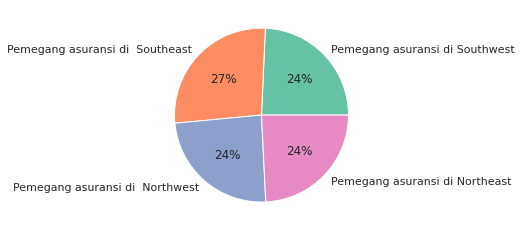

In [ ]:
region_pie_label = ["Pemegang asuransi di Southwest","Pemegang asuransi di  Southeast", "Pemegang asuransi di  Northwest", "Pemegang asuransi di Northeast"]
region_pie_data = [sw_ph, se_ph, nw_ph, ne_ph]

plt.pie(region_pie_data, labels=region_pie_label, colors=sns.color_palette('Set2'), autopct='%.0f%%')

In [ ]:
# b. Proporsi Status Perokok
n_smoker = len(data[data["smoker"]=="yes"])
n_non_smoker = len(data[data["smoker"]=="no"])

print(f"Jumlah perokok pemegang asuransi: {n_smoker}")
print(f"Jumlah bukan perokok pemegang asuransi: {n_non_smoker}")

Jumlah perokok pemegang asuransi: 274
Jumlah bukan perokok pemegang asuransi: 1064


([<matplotlib.patches.Wedge at 0x7f9e0fcbfe50>,
 [Text(0.8801026332278259, 0.6598631335250115, 'Perokok'),
  Text(-0.880102633227826, -0.6598631335250114, 'Bukan Perokok')],
 [Text(0.48005598176063224, 0.35992534555909717, '20%'),
  Text(-0.4800559817606323, -0.3599253455590971, '80%')])

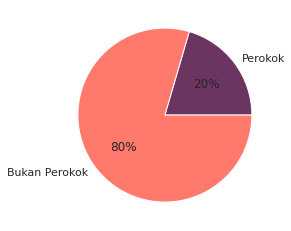

In [ ]:
smoker_color = ['#6c3461', # Smoker
                '#ff796c', # Non-smoker
               ]
smoker_pie_label = ["Perokok", "Bukan Perokok"]
smoker_pie_data = [n_smoker, n_non_smoker]

plt.pie(smoker_pie_data, labels=smoker_pie_label, colors=sns.color_palette(smoker_color), autopct='%.0f%%')

In [ ]:
# C. Proporsi Jenis Kelamin
n_male = len(data[data["sex"]=="male"])
n_female = len(data[data["sex"]=="female"])

print(f"Jumlah pria pemegang asuransi: {n_male}")
print(f"Jumlah perempuan pemegang asuransi: {n_female}")

Jumlah pria pemegang asuransi: 676
Jumlah perempuan pemegang asuransi: 662


([<matplotlib.patches.Wedge at 0x7f9e0fc93910>,
 [Text(-0.018078568997004985, 1.0998514287589123, 'Pria'),
  Text(0.018078568997005343, -1.0998514287589123, 'Perempuan')],
 [Text(-0.009861037634729992, 0.5999189611412249, '51%'),
  Text(0.009861037634730185, -0.5999189611412248, '49%')])

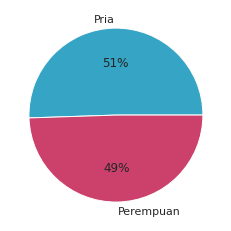

In [ ]:
gender_color = ['#36a4c4', #Male
                '#cb416b', #Female
               ]
gender_pie_label = ["Pria", "Perempuan"]
gender_pie_data = [n_male, n_female]

plt.pie(gender_pie_data, labels=gender_pie_label, colors=sns.color_palette(gender_color), autopct='%.0f%%')

2. Probabilitas

In [ ]:
# Probabilitas pemegang asuransi pria dan wanita jika diketahui sebagai perokok
n_smoker = len(data[data["smoker"]=="yes"])
n_smoker_female = len(data[(data["smoker"]=="yes") & (data["sex"]=="female")])
n_smoker_male = len(data[(data["smoker"]=="yes") & (data["sex"]=="male")])

print(f"n(perokok)= {n_smoker}")
print(f"n(perokok pria)= {n_smoker_male}")
print(f"n(perokok perempuan)= {n_smoker_female} \n")

p_smoker_male = n_smoker_male / n_smoker
p_smoker_female = n_smoker_female / n_smoker

print(f"P(pria|perokok)= {round(p_smoker_male,2)}")
print(f"P(perempuan|perokok)= {round(p_smoker_female,2)}")

n(perokok)= 274
n(perokok pria)= 159
n(perokok perempuan)= 115 

P(pria|perokok)= 0.58
P(perempuan|perokok)= 0.42


**C. Continuous Variables Analysis**

1. Mana yang lebih mungkin terjadi di antara dua kondisi di bawah ini:

  *   Pemegang asuransi yang merupakan perokok memiliki tagihan pengobatan di atas 16.7k.
  *   Pemegang asuransi yang bukan perokok memiliki tagihan medis di atas 16.7k.

In [ ]:
n_smoker = len(data[(data["smoker"]=="yes")])
n_smoker_ch167 = len(data[(data["smoker"]=="yes") & 
                                    (data["charges"]>16700)])
p_smoker_ch167 = n_smoker_ch167 / n_smoker

print("n(perokok)=",n_smoker)
print("n(perokok n tagihan>16.7k)=",n_smoker_ch167)
print("P(perokok n tagihan>16.7k)=",p_smoker_ch167)

n(perokok)= 274
n(perokok n tagihan>16.7k)= 254
P(perokok n tagihan>16.7k)= 0.927007299270073


In [ ]:
n_nonsmoker = len(data[(data["smoker"]=="no")])
n_nonsmoker_ch167 = len(data[(data["smoker"]=="no") & 
                                       (data["charges"]>16700)])
p_nonsmoker_ch167 = n_nonsmoker_ch167 / n_nonsmoker

print("n(bukan perokok)=",n_nonsmoker)
print("n(bukan perokok n tagihan>16.7k)=",n_nonsmoker_ch167)
print("P(bukan perokok n tagihan>16.7k)=",p_nonsmoker_ch167)

n(bukan perokok)= 1064
n(bukan perokok n tagihan>16.7k)= 80
P(bukan perokok n tagihan>16.7k)= 0.07518796992481203


Pemegang asuransi yang merupakan perokok lebih cenderung memiliki tagihan medis di atas 16,7 ribu dibandingkan dengan bukan perokok.

2. Manakah yang lebih mungkin terjadi di antara dua kondisi di bawah ini:

    *  Pemegang asuransi dengan BMI di atas 25 memiliki tagihan medis di atas 16.7k
    *  Pemegang asuransi dengan BMI di bawah 25 memiliki tagihan medis di atas 16.7k

In [ ]:
n_bmia25 = len(data[(data["bmi"]>25)])
n_bmia25_ch167 = len(data[(data["bmi"]>25) & 
                                    (data["charges"]>16700)])
p_bmia25_ch167 = n_bmia25_ch167 / n_bmia25
print("n(bmi>25)=",n_bmia25)
print("n(bmi>25 n tagihan>16.7k)=",n_bmia25_ch167)
print("P(bmi>25 n tagihan>16.7k)=",p_bmia25_ch167)

n(bmi>25)= 1091
n(bmi>25 n tagihan>16.7k)= 283
P(bmi>25 n tagihan>16.7k)= 0.25939505041246563


In [ ]:
n_bmiu25 = len(data[(data["bmi"]<25)])
n_bmiu25_ch167 = len(data[(data["bmi"]<25) & 
                                    (data["charges"]>16700)])
p_bmiu25_ch167 = n_bmiu25_ch167 / n_bmiu25
print("n(bmi<25)=", n_bmiu25)
print("n(bmi<25 n tagihan>16.7k)=", n_bmiu25_ch167)
print("P(bmi<25 n tagihan>16.7k)=", p_bmiu25_ch167)

n(bmi<25)= 245
n(bmi<25 n tagihan>16.7k)= 51
P(bmi<25 n tagihan>16.7k)= 0.20816326530612245


Pemegang asurasi yang memiliki BMI >25 lebih cenderung memiliki tagihan medis di atas 16,7 ribu dibandingkan dengan mereka yang memiliki BMI <25.

**D. Variables Correlation**

kovarians antara variabel kuantitatif
                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08 

koefisien korelasi antara variabel kuantitatif
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


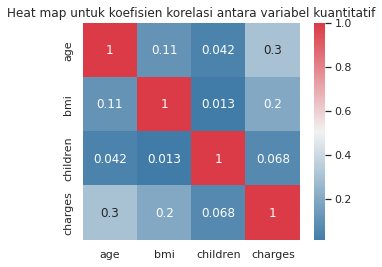

In [ ]:
# 1. Korelasi antara variabel numerik
cov_data = data.cov()
corr_data = data.corr()

print('kovarians antara variabel kuantitatif')
print(cov_data,'\n')
print('koefisien korelasi antara variabel kuantitatif')
print(corr_data)

f, ax = plt.subplots(figsize=(5, 4))
plt.title("Heat map untuk koefisien korelasi antara variabel kuantitatif")
sns.heatmap(corr_data, mask=np.zeros_like(corr_data, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, annot = True, ax=ax)

Berdasarkan nilai koefisien korelasi antara usia dan tagihan memiliki korelasi tertinggi yaitu 0,3 (positif) dan diikuti oleh IMT dan tagihan dengan nilai koefisien korelasi 0,2 (positif).

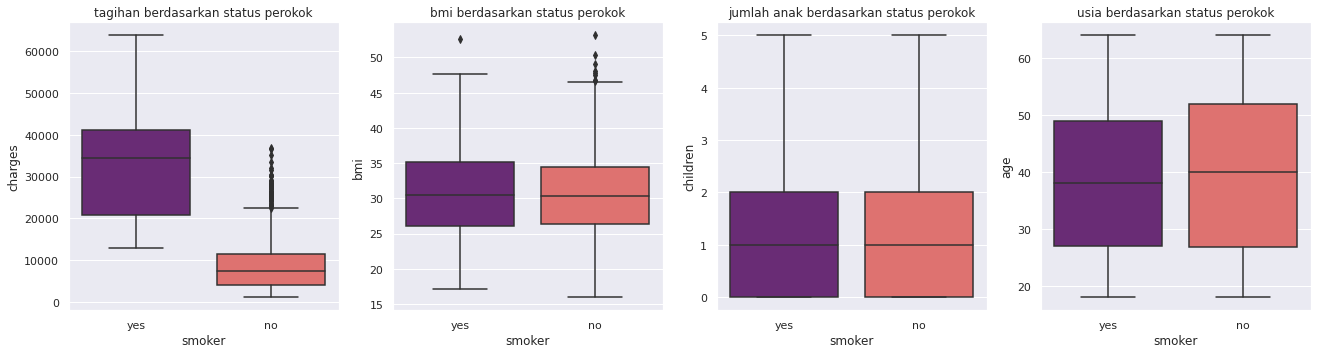

In [ ]:
# 2. Korelasi antara variabel numerik dan kategorikal
plt.subplots_adjust(bottom=1, right=3, top=2)

plt.subplot(141)
plt.title("tagihan berdasarkan status perokok")
sns.boxplot(y="charges", x="smoker", data =  data, palette = 'magma')

plt.subplot(142)
plt.title("bmi berdasarkan status perokok")
sns.boxplot(y="bmi", x="smoker", data =  data, palette = 'magma')

plt.subplot(143)
plt.title("jumlah anak berdasarkan status perokok")
sns.boxplot(y="children", x="smoker", data =  data, palette = 'magma')

plt.subplot(144)
plt.title("usia berdasarkan status perokok")
sns.boxplot(y="age", x="smoker", data =  data, palette = 'magma')

* Perokok telah mengeluarkan tagihan lebih banyak untuk asuransi daripada bukan perokok. Ada outlier pada bukan perokok.
* Meskipun memiliki rata-rata yang sama, BMI perokok memiliki kuartil atas yang lebih tinggi dan kuartil bawah yang lebih rendah dibandingkan dengan bukan perokok.
* BMI non-perokok memiliki banyak outlier.
* Jumlah anak dari perokok dan bukan perokok hampir sama.

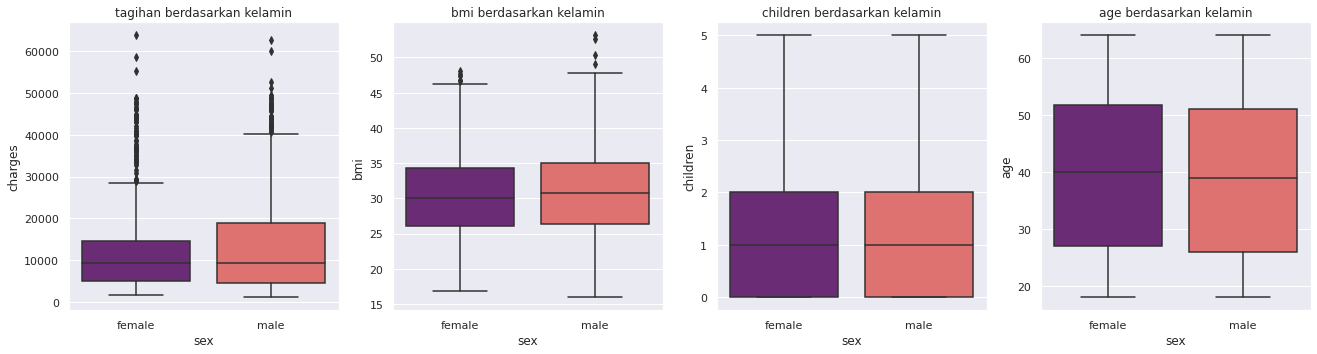

In [ ]:
plt.subplots_adjust(bottom=1, right=3, top=2)

plt.subplot(141)
plt.title("tagihan berdasarkan kelamin")
sns.boxplot(y="charges", x="sex", data =  data, palette = 'magma')

plt.subplot(142)
plt.title("bmi berdasarkan kelamin")
sns.boxplot(y="bmi", x="sex", data =  data, palette = 'magma')

plt.subplot(143)
plt.title("children berdasarkan kelamin")
sns.boxplot(y="children", x="sex", data =  data, palette = 'magma')

plt.subplot(144)
plt.title("age berdasarkan kelamin")
sns.boxplot(y="age", x="sex", data =  data, palette = 'magma')

* Usia rata-rata pemegang asuransi wanita sedikit lebih tinggi daripada pemegang asuransi pria.
* Jumlah anak yang dimiliki nasabah laki-laki dan perempuan sama.
* BMI pemegang asuransi pria memiliki banyak outlier dan BMI rata-rata pria sedikit lebih tinggi daripada wanita.
* Pemegang asuransi laki-laki lebih banyak dikenakan tagihan asuransi. dibandingkan dengan pemegang asuransi perempuan. Ada banyak outlier pada pemegang asuransi wanita.

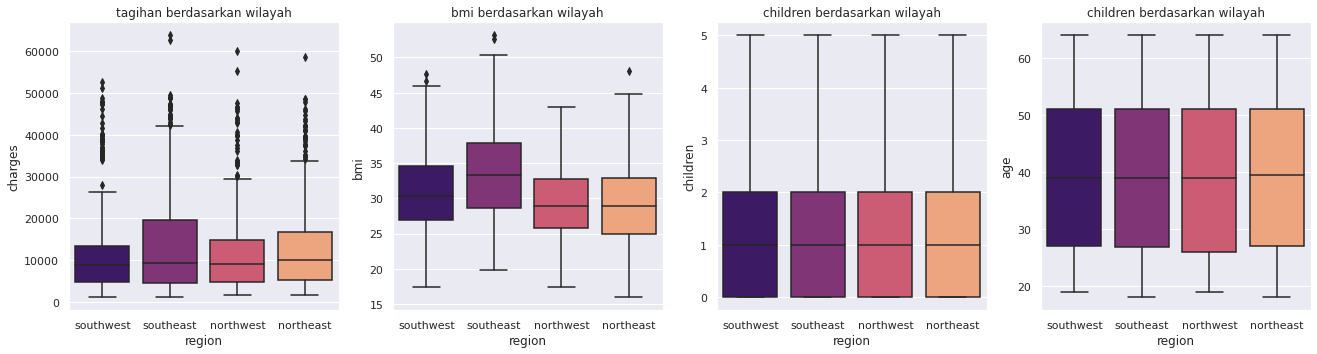

In [ ]:
plt.subplots_adjust(bottom=1, right=3, top=2)

plt.subplot(141)
plt.title("tagihan berdasarkan wilayah")
sns.boxplot(y="charges", x="region", data =  data, palette = 'magma')

plt.subplot(142)
plt.title("bmi berdasarkan wilayah")
sns.boxplot(y="bmi", x="region", data =  data, palette = 'magma')

plt.subplot(143)
plt.title("children berdasarkan wilayah")
sns.boxplot(y="children", x="region", data =  data, palette = 'magma')

plt.subplot(144)
plt.title("children berdasarkan wilayah")
sns.boxplot(y="age", x="region", data =  data, palette = 'magma')

* Usia dan jumlah anak di seluruh wilayah hampir sama.
* Rata-rata BMI dari tenggara lebih tinggi dibandingkan dengan daerah lain.
* tagihan yang dikeluarkan dari tenggara lebih tinggi dibandingkan dengan daerah lain.
* Ada banyak outlier di ujung atas dalam tagihan.

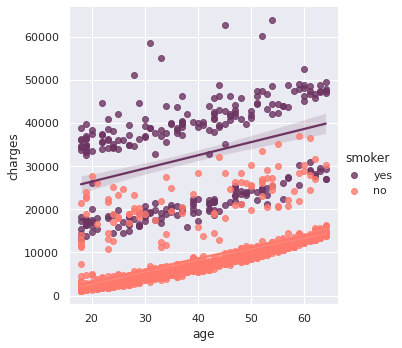

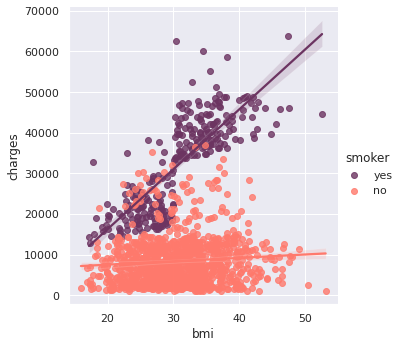

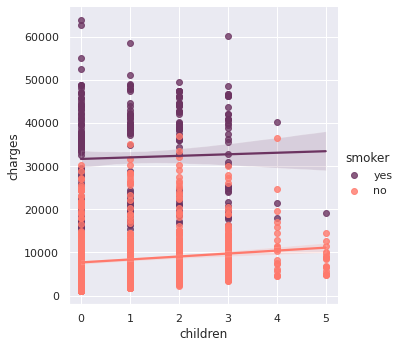

In [ ]:
smoker_color = ['#6c3461', # Smoker
                '#ff796c', # Non-smoker
               ]

ax = sns.lmplot(x = 'age', y = 'charges', data=data, hue='smoker', palette=smoker_color)
ax = sns.lmplot(x = 'bmi', y = 'charges', data=data, hue='smoker', palette=smoker_color)
ax = sns.lmplot(x = 'children', y = 'charges', data=data, hue='smoker', palette=smoker_color)

* Baik pada kelompok perokok maupun bukan perokok, usia memiliki korelasi positif dengan tagihan (tidak bias).
* Status perokok mempengaruhi korelasi antara IMT dan tagihan, dimana korelasi meningkat secara signifikan dengan status perokok.
* Perokok memiliki anak yang lebih sedikit dibandingkan dengan bukan perokok.
* Status perokok tidak memiliki pengaruh yang signifikan terhadap korelasi antara tagihan dan anak.

In [ ]:
# Uji independensi chi square
cont_sex_smoker = pd.crosstab(data['sex'],
                              data['smoker'])
cont_region_smoker = pd.crosstab(data['region'],
                              data['smoker'])
cont_region_sex = pd.crosstab(data['region'],
                              data['sex'])

In [ ]:
#independency test sex-smoker
c, p, dof, expected = chi2_contingency(cont_sex_smoker)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.006548143503580696
Dependent (reject H0)


In [ ]:
#independency test region-smoker
c, p, dof, expected = chi2_contingency(cont_region_smoker)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.06171954839170541
Independent (H0 holds true)


In [ ]:
#independency test region-sex
c, p, dof, expected = chi2_contingency(cont_region_sex)
p

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9328921288772233
Independent (H0 holds true)


**E. Pengujian Hipotesis**

**1. Pengujian hipotesis: Tagihan medis orang yang merokok lebih besar daripada mereka yang tidak merokok**

1. Tentukan hipotesis nol dan alt:
   - H0: μ1 <= μ2 Tagihan rata-rata perokok lebih kecil dari atau sama dengan bukan perokok
   - H1: μ1 > μ2 Tagihan rata-rata perokok lebih besar daripada bukan perokok
2. Tentukan tingkat signifikansi. Jika nilai P kurang dari alpha tolak hipotesis nol.
   - α = 0.05
3. Identifikasi tes:
   - Karena standar deviasi populasi tidak diketahui, maka uji statistik T akan sesuai.
   - Tanda > pada hipotesis alternatif menunjukkan uji tail ke arah kanan
4. Periksa jumlah sampel:



In [ ]:
n_smoker = len(data[data['smoker']=='yes'])
n_nonsmoker = len(data[data['smoker']=='no'])
print('jumlah sampel perokok:', n_smoker)
print('jumlah sampel bukan perokok:', n_nonsmoker)

jumlah sampel perokok: 274
jumlah sampel bukan perokok: 1064


5. Karena ukuran sampel perokok tidak sama dengan bukan perokok, uji bartlett dilakukan untuk memastikan varians sama untuk semua sampel:
   - H0: Varians sama untuk semua sampel
   - H1: Variansi tidak sama untuk satu pasang atau lebih

In [ ]:
smoker_charges = data.loc[data['smoker']=='yes','charges']
nonsmoker_charges = data.loc[data['smoker']=='no','charges']

stat_bart, p_bart = stats.bartlett(smoker_charges, nonsmoker_charges)

# interpret p-value
alpha = 0.05
print("nilai p-value " + str(p_bart))
if p_bart <= alpha:
    print('Variansnya tidak sama (reject H0)')
else:
    print('Variansnya sama (H0 holds true)')

nilai p-value 5.06089742139399e-52
Variansnya tidak sama (reject H0)


6. Karena pengujian menunjukkan bahwa varians tidak sama, ada dua metode yang tersedia, yaitu:
   - Gunakan Welch's t-Test.
   - Atau gunakan independent t-test dengan jumlah sampel yang disesuaikan dari bukan perokok.

Dalam proyek ini akan digunakan Welch's t-test. Welch's t-test dapat dilakukan dengan menambahkan "equal_var=False".

In [ ]:
alpha = 0.05
t_stat_1, p_val_t1 = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False)
p_value_onetail_1 = p_val_t1/2

print("uji statistik = {} , p-value ={} , one-tail p-value = {}".format(t_stat_1,p_val_t1, p_value_onetail_1 ))

if p_value_onetail_1 < alpha :
    print("Tagihan rata-rata perokok lebih besar daripada bukan perokok (reject H0)")
    
else:
    print("Tagihan rata-rata perokok kurang dari atau sama dengan bukan perokok (H0 holds true)")

uji statistik = 32.751887766341824 , p-value =5.88946444671698e-103 , one-tail p-value = 2.94473222335849e-103
Tagihan rata-rata perokok lebih besar daripada bukan perokok (reject H0)


**2. Pengujian hipotesis: Tagihan medis orang dengan nilai BMI di atas 25 lebih tinggi daripada mereka yang memiliki nilai BMI di bawah 25**

1. Tentukan hipotesis nol dan alt:
   - H0: μ1 < μ2 Rata-rata tagihan nasabah asuransi dengan BMI di atas 25 lebih kecil dari atau sama dengan mereka yang memiliki nilai BMI di bawah 25
   - H1: μ1 > μ2 Tagihan rata-rata pelanggan asuransi dengan BMI di atas 25 lebih besar daripada mereka yang memiliki nilai BMI di bawah 25

2. Tentukan tingkat signifikansi. Jika nilai P kurang dari alpha tolak hipotesis nol.
   - α = 0.05
3. Identifikasi tes:
   - Karena standar deviasi populasi tidak diketahui, uji statistik T akan sesuai.
   - Tanda > pada hipotesis alternatif menunjukkan uji tail ke arah kanan
   
   Periksa jumlah sampel


In [ ]:
n_bmi_a_25 = len(data[data['bmi']>25])
n_bmi_u_25 = len(data[data['bmi']<25])
print('jumlah bmi di atas 25:', n_bmi_a_25)
print('jumlah bmi di bawah 25:', n_bmi_u_25)

jumlah bmi di atas 25: 1091
jumlah bmi di bawah 25: 245


2. Karena ukuran sampel tidak sama, uji bartlett dilakukan untuk memastikan varians sama untuk semua sampel:
   - H0: Varians sama untuk semua sampel
   - H1: Variansi tidak sama untuk satu pasangan atau lebih

In [ ]:
bmi_a_25_charges = data.loc[data['bmi']>25,'charges']
bmi_u_25_charges = data.loc[data['bmi']<25,'charges']

stat_bart, p_bart = stats.bartlett(bmi_a_25_charges, bmi_u_25_charges)

# interpret p-value
alpha = 0.05
print("Nilai p-value " + str(p_bart))
if p_bart <= alpha:
    print('Variansnya tidak sama (reject H0)')
else:
    print('Variansnya sama  (H0 holds true)')

Nilai p-value 2.3532085528057478e-21
Variansnya tidak sama (reject H0)


3. Karena pengujian menunjukkan bahwa varians tidak sama, ada dua metode yang tersedia, yaitu:
   - Gunakan Welch's t-Test.
   - Atau gunakan independent t-test dengan jumlah sampel yang disesuaikan dari bukan perokok.

Dalam proyek ini akan digunakan Welch's t-test. Welch's t-test dapat dilakukan dengan menambahkan "equal_var=False".

In [ ]:
alpha = 0.05
t_stat_2, p_val_t2 = stats.ttest_ind(bmi_a_25_charges, bmi_u_25_charges, equal_var = False)
p_value_onetail_2 = p_val_t2/2

print("uji statistik = {} , p-value ={} , one-tail p-value = {}".format(t_stat_2,p_val_t2, p_value_onetail_2 ))

if p_value_onetail_2 < alpha :
    print("Tagihan rata-rata nasabah asuransi dengan BMI di atas 25 lebih besar daripada mereka yang memiliki nilai BMI di bawah 25 (reject H0)")
    
else:
    print("Tagihan rata-rata pelanggan asuransi dengan BMI di atas 25 lebih kecil atau sama dengan mereka yang memiliki nilai BMI di bawah 25 (H0 holds true)")

uji statistik = 5.929878344096734 , p-value =5.080897303161378e-09 , one-tail p-value = 2.540448651580689e-09
Tagihan rata-rata nasabah asuransi dengan BMI di atas 25 lebih besar daripada mereka yang memiliki nilai BMI di bawah 25 (reject H0)


**3. Pengujian hipotesis: Tagihan medis laki-laki lebih tinggi daripada perempuan**

1. Tentukan hipotesis nol dan alt:
   - H0: μ1 <= μ2 Rata-rata tagihan laki-laki kurang dari atau sama dengan perempuan
   - H1: μ1 > μ2 Tagihan rata-rata laki-laki lebih besar dari perempuan
2. Tentukan tingkat signifikansi. Jika nilai P kurang dari alpha, tolak hipotesis nol.
   - α = 0.05
3. Identifikasi tes:
   - Karena standar deviasi populasi tidak diketahui, maka uji statistik T akan sesuai.
   - Tanda > pada hipotesis alternatif menunjukkan uji tail ke arah kanan
4. Periksa jumlah sampel:

In [ ]:
n_male = len(data[data['sex']=='male'])
n_female = len(data[data['sex']=='female'])
print('jumlah pria:', n_male)
print('jumlah perempuan:', n_female)

jumlah pria: 676
jumlah perempuan: 662


5. Ukuran sampel hampir sama, namun kita tetap akan melakukan uji bartlett untuk memastikan varians sama untuk semua sampel:
   - H0: Varians sama untuk semua sampel
   - H1: Variansi tidak sama untuk satu pasangan atau lebih

In [ ]:
male_charges = data.loc[data['sex']=='male','charges']
female_charges = data.loc[data['sex']=='female','charges']

stat_bart, p_bart = stats.bartlett(male_charges, female_charges)

# interpret p-value
alpha = 0.05
print("nilai p-value " + str(p_bart))
if p_bart <= alpha:
    print('Variansinya tidak sama (reject H0)')
else:
    print('Variansinya sama (H0 holds true)')

nilai p-value 7.886776680290195e-05
Variansinya tidak sama (reject H0)


6. Karena pengujian menunjukkan bahwa varians tidak sama, ada dua metode yang tersedia, yaitu:
   - Gunakan Welch's t-Test.
   - Atau gunakan independent t-test dengan jumlah sampel yang disesuaikan dari bukan perokok.

Dalam proyek ini akan digunakan Welch's t-test. Welch's t-test dapat dilakukan dengan menambahkan "equal_var=False".

In [ ]:
alpha = 0.05
t_stat_3, p_val_t3 = stats.ttest_ind(male_charges, female_charges, equal_var = False)
p_value_onetail_3 = p_val_t3/2

print("uji statistik = {} , p-value ={} , one-tail p-value = {}".format(t_stat_3,p_val_t3, p_value_onetail_3 ))

if p_value_onetail_3 < alpha :
    print("Tagihan rata-rata laki-laki lebih besar daripada perempuan (reject H0)")
    
else:
    print("Tagihan rata-rata laki-laki kurang dari atau sama dengan perempuan (H0 holds true)")

uji statistik = 2.1008878232359565 , p-value =0.035841014956016645 , one-tail p-value = 0.017920507478008323
Tagihan rata-rata laki-laki lebih besar daripada perempuan (reject H0)


**Kesimpulan**

1. Berdasarkan analisis yang dilakukan, beberapa variabel berpengaruh signifikan terhadap nilai tagihan pengobatan seorang nasabah asuransi. Variabel-variabel tersebut antara lain:
   - BMI
   - Usia
   - Status Perokok
   - Jenis Kelamin
2. Seseorang dengan nilai BMI yang tinggi lebih rentan terhadap penyakit, yang dapat menyebabkan tagihan medis yang lebih tinggi.
3. Jenis kelamin berpengaruh pada nilai tagihan, di mana laki-laki memiliki tagihan yang lebih tinggi dibandingkan dengan perempuan. Namun, perbedaan antara kedua jenis kelamin tersebut kecil.
4. Usia berpengaruh pada nilai tagihan, karena pelanggan yang lebih tua lebih rentan terhadap penyakit.
5. Status perokok memiliki dampak besar pada nilai tagihan.
6. Selain itu status perokok dapat meningkatkan efek BMI dan usia terhadap nilai tagihan.

Beberapa variabel memiliki pengaruh pada jumlah tagihan medis. Namun, satu-satunya variabel yang dapat dikontrol adalah BMI dan status perokok. Dengan demikian, penyedia asuransi harus fokus pada dua variabel ini untuk menekan selisih tagihan medis.